# 1. Load dataset

In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
housing_data = fetch_california_housing()

In [3]:
print(housing_data)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [7]:
print('input data:\n', housing_data['data'].shape)
print('target data:\n', housing_data['target'].shape)
print('input names:\n', housing_data.feature_names)
print('target names:\n', housing_data.target_names)

input data:
 (20640, 8)
target data:
 (20640,)
input names:
 ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
target names:
 ['MedHouseVal']


## Convert numpy to pandas

In [9]:
import numpy as np
import pandas as pd

In [10]:
data_df = pd.DataFrame(data=np.concatenate((housing_data['data'], \
                                            np.array(housing_data['target']).reshape(-1,1)), axis=1), \
                                                columns=housing_data.feature_names + housing_data.target_names)

In [12]:
data_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
data_df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


# Analyze data

In [14]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [15]:
data_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'MedHouseVal'}>]], dtype=object)

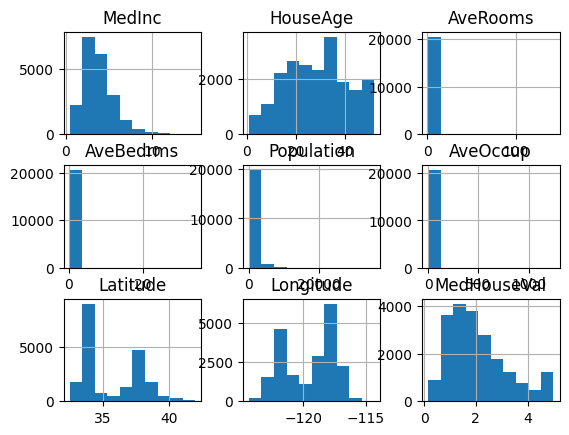

In [16]:
data_df.hist()

# Preprocessing

## Filling missing value

In [19]:
data_df.isnull().any()

MedInc         False
HouseAge       False
AveRooms       False
AveBedrms      False
Population     False
AveOccup       False
Latitude       False
Longitude      False
MedHouseVal    False
dtype: bool

## Normalization (standard scaler)

In [20]:
from sklearn import preprocessing

In [21]:
scaler = preprocessing.StandardScaler()

In [23]:
data_df_scaled = scaler.fit_transform(data_df)
data_df_scaled = pd.DataFrame(data_df_scaled)

In [24]:
data_df_scaled.describe()

,0,1,2,3,4,5,6,7,8
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,6.609700e-17,5.508083e-18,6.609700e-17,-1.060306e-16,-1.101617e-17,3.442552e-18,-1.079584e-15,-8.526513e-15,2.037991e-16
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.774299e+00,-2.196180e+00,-1.852319e+00,-1.610768e+00,-1.256123e+00,-2.290000e-01,-1.447568e+00,-2.385992e+00,-1.662641e+00
25%,-6.881186e-01,-8.453931e-01,-3.994496e-01,-1.911716e-01,-5.638089e-01,-6.171062e-02,-7.967887e-01,-1.113209e+00,-7.561633e-01
50%,-1.767951e-01,2.864572e-02,-8.078489e-02,-1.010650e-01,-2.291318e-01,-2.431585e-02,-6.422871e-01,5.389137e-01,-2.353337e-01
75%,4.593063e-01,6.643103e-01,2.519615e-01,6.015869e-03,2.644949e-01,2.037453e-02,9.729566e-01,7.784964e-01,5.014973e-01
max,5.858286e+00,1.856182e+00,5.516324e+01,6.957171e+01,3.025033e+01,1.194191e+02,2.958068e+00,2.625280e+00,2.540411e+00


## Feature selection

In [26]:
from sklearn.feature_selection import r_regression

In [27]:
result = r_regression(data_df_scaled.iloc[:,:8], data_df_scaled.iloc[:,8])

In [28]:
result

array([ 0.68807521,  0.10562341,  0.15194829, -0.04670051, -0.02464968,
       -0.02373741, -0.14416028, -0.04596662])

In [30]:
data_ok = data_df_scaled.iloc[:,:3]
data_ok.shape

(20640, 3)

## Split the dataset

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
train_length = 0.8
test_length = 0.2

In [34]:
X_train, X_test, y_train, y_test = train_test_split(data_ok, data_df_scaled.iloc[:,8], test_size=test_length, train_size=train_length, shuffle=False)

print('Input train shape: ', X_train.shape)
print('Target train shape: ', y_train.shape)
print('Input test shape', X_test.shape)
print('Target test shape', y_test.shape)

Input train shape:  (16512, 3)
Target train shape:  (16512,)
Input test shape (4128, 3)
Target test shape (4128,)


# Build the model

## Linear regression

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
model = LinearRegression()

In [37]:
model.fit(X_train, y_train)

LinearRegression()

In [38]:
pred_result = model.predict(X_test)

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
mse_loss = mean_squared_error(y_test, pred_result)
r2_loss = r2_score(y_test, pred_result)

print(mse_loss, r2_loss)

0.49488121798091833 0.5477779395650311


## MLP

In [41]:
X_train

,0,1,2
0,2.344766,0.982143,0.628559
1,2.332238,-0.607019,0.327041
2,1.782699,1.856182,1.155620
3,0.932968,1.856182,0.156966
4,-0.012881,1.856182,0.344711
...,...,...,...
16507,0.289839,-1.401600,0.774797
16508,-0.269964,0.505394,0.008488
16509,0.164561,-0.527561,0.458844
16510,-0.225327,-1.719432,-0.005095


In [42]:
from sklearn.neural_network import MLPRegressor

In [43]:
model = MLPRegressor(hidden_layer_sizes=3, activation='relu', max_iter=2000)

In [44]:
model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=3, max_iter=2000)

In [45]:
pred_result_mlp = model.predict(X_test)

In [46]:
mse_loss = mean_squared_error(y_test, pred_result_mlp)
r2_loss = r2_score(y_test, pred_result_mlp)

print('MSE loss: ', mse_loss)
print('R2 loss', r2_loss)

MSE loss:  0.44704484522404825
R2 loss 0.5914907786582315


In [47]:
import matplotlib.pyplot as plt

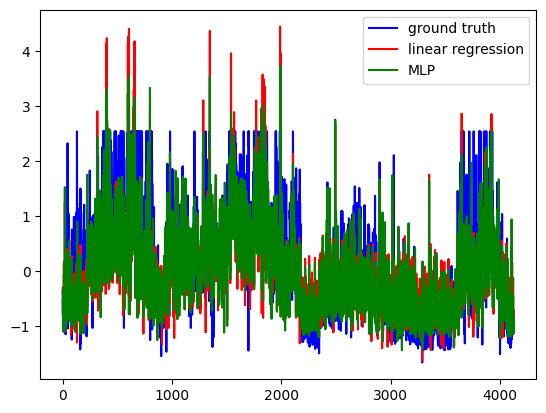

In [48]:
plt.plot(y_test.to_numpy(), "-b", label="ground truth")
plt.plot(pred_result, "-r", label="linear regression")
plt.plot(pred_result_mlp, "-g", label="MLP")
plt.legend(loc="upper right")
plt.show()